Importing libraries and setting up aliases

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Creating a custom K-Nearest Neighbours classification class with methods for fitting the model,making predictions, finding neighbors , and calculating Euclidean distance

In [2]:
class K_Nearest_Neighbors_Classifier() :

	def __init__( self, K=3) :
		self.K = K

	# Function to store training set
	def fit( self, X_train, Y_train ) :
		self.X_train = X_train
		self.Y_train = Y_train
		# no_of_training_examples, no_of_features
		self.m, self.n = X_train.shape

	# Function for prediction
	def predict( self, X_test ) :
		self.X_test = X_test
		# no_of_test_examples, no_of_features
		self.m_test, self.n = X_test.shape
		# initialize Y_predict
		Y_predict = np.zeros( self.m_test )
		for i in range( self.m_test ):
			x = self.X_test[i]
			# find the K nearest neighbors from current test example
			neighbors = np.zeros( self.K )
			neighbors = self.find_neighbors( x )
			# most frequent class in K neighbors
			Y_predict[i] = mode( neighbors )[0][0]
		return Y_predict

	# Function to find the K nearest neighbors to current test example
	def find_neighbors( self, x ) :
		# calculate all the euclidean distances between current test example x and training set X_train
		euclidean_distances = np.zeros( self.m )
		for i in range( self.m ) :
			d = self.euclidean( x, self.X_train[i] )
			euclidean_distances[i] = d
		# sort Y_train according to euclidean_distance_array and store into Y_train_sorted
		inds = euclidean_distances.argsort()
		Y_train_sorted = self.Y_train[inds]
		return Y_train_sorted[:self.K]

	# Function to calculate euclidean distance
	def euclidean( self, x, x_train ) :
		return np.sqrt( np.sum( np.square( x - x_train )))

Load CSV file


Reading a CSV file

In [3]:
df = pd.read_csv( "/content/apple_quality.csv" )
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


Describing the columns in a dataset

#**Description of Columns**
A_id: Unique identifier for each fruit

Size: Size of the fruit

Weight: Weight of the fruit

Sweetness: Degree of sweetness of the fruit

Crunchiness: Texture indicating the crunchiness of the fruit

Juiciness: Level of juiciness of the fruit

Ripeness: Stage of ripeness of the fruit

Acidity: Acidity level of the fruit

Quality: Overall quality of the fruit


Columns and their data types


Providing summary of the dataset including data types, non-null counts, and memory usage

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


Displaying the count of missing values for each column in the dataset

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


<Axes: >

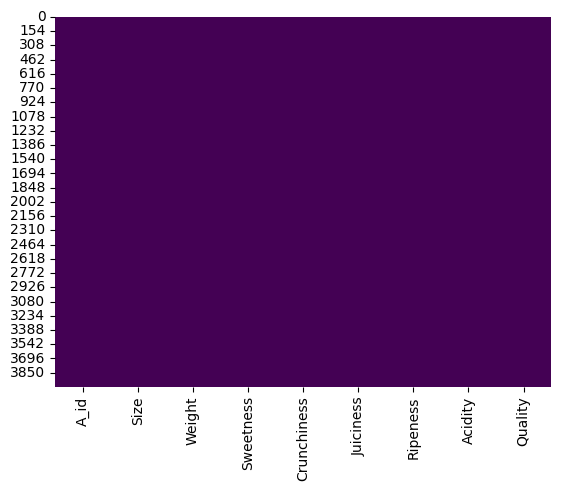

In [5]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

Inference:

There is no missing values in the given dataset

Displaying the count of unique values for each column in the dataset

In [6]:
df.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality           2
dtype: int64

Printing unique values for each column in the dataset

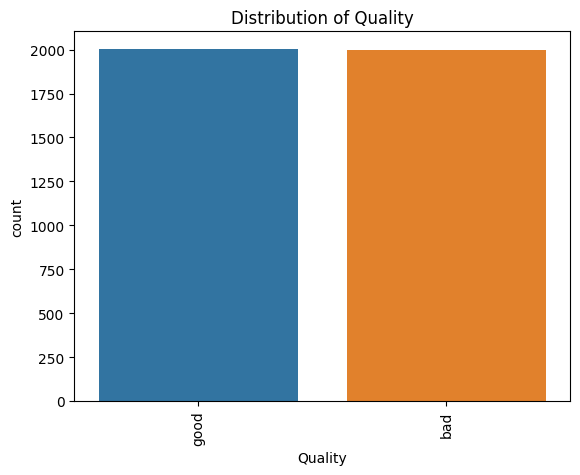

In [7]:

selected_df=df.drop(["A_id","Size","Weight","Crunchiness","Acidity","Sweetness", "Juiciness", "Ripeness"],axis=1)
for col in selected_df.columns:
    sns.countplot(x=col,hue='Quality', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

Inference:

The dataset is a balanced one

Generating a list comprehension to retrieve unique values for each column in the dataset

In [8]:
[df[col].unique() for col in df ]

[array([   0,    1,    2, ..., 3997, 3998, 3999]),
 array([-3.97004852, -1.19521719, -0.29202386, ..., -2.6345153 ,
        -4.00800374,  0.27853965]),
 array([-2.51233638, -2.83925653, -1.35128199, ..., -2.13824672,
        -1.77933711, -1.71550503]),
 array([ 5.34632961,  3.66405876, -1.73842916, ..., -2.44046129,
         2.36639697,  0.12121725]),
 array([-1.01200871,  1.58823231, -0.34261593, ...,  0.65722289,
        -0.20032937, -1.15407476]),
 array([1.84490036, 0.8532858 , 2.83863551, ..., 2.19970859, 2.16143512,
        1.2666774 ]),
 array([ 0.3298398 ,  0.86753008, -0.03803333, ...,  4.76385918,
         0.21448838, -0.77657147]),
 array([-0.49159048, -0.72280937,  2.62163647, ..., -1.33461139,
        -2.22971981,  1.59979646]),
 array(['good', 'bad'], dtype=object)]

Defining a custom encoder class which fits and transforms categorical columns in a dataset

In [9]:
cols=['Quality']
mm = MinMaxScaler()
mappin = dict()
for variable in cols:
    mappings = {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}
    mappin[variable] = mappings

for variable in cols:
    df[variable] = df[variable].map(mappin[variable])

for i in cols:
        df[i] = round(df[i]).astype('int')
df  = df.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00000,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,0.0
1,0.00025,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,0.0
2,0.00050,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,1.0
3,0.00075,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,0.0
4,0.00100,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,0.0
...,...,...,...,...,...,...,...,...,...
3995,0.99900,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,1.0
3996,0.99925,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,0.0
3997,0.99950,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,1.0
3998,0.99975,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,0.0


Printing the total number of duplicate rows in the dataset

In [10]:
print(f'Total duplicate rows: {df.duplicated().sum()}')

Total duplicate rows: 0


Generating a transposed summary statistics table for the dataset including count, mean, standard deviation, minimum, and maximum values for numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,0.500000,0.288783,0.0,0.250000,0.500000,0.750000,1.0
Size,4000.0,0.490386,0.142207,0.0,0.393488,0.489598,0.586900,1.0
Weight,4000.0,0.476046,0.123836,0.0,0.397052,0.476418,0.554908,1.0
Sweetness,4000.0,0.484122,0.146460,0.0,0.388568,0.481538,0.580012,1.0
Crunchiness,4000.0,0.514851,0.102579,0.0,0.447376,0.515785,0.581305,1.0
Juiciness,4000.0,0.485807,0.144848,0.0,0.387250,0.487466,0.585149,1.0
Ripeness,4000.0,0.485625,0.143059,0.0,0.388700,0.486020,0.582396,1.0
Acidity,4000.0,0.491660,0.146391,0.0,0.390774,0.487895,0.591111,1.0
Quality,4000.0,0.499000,0.500062,0.0,0.000000,0.000000,1.000000,1.0


Generating a heatmap visualization of the correlation matrix

<Axes: >

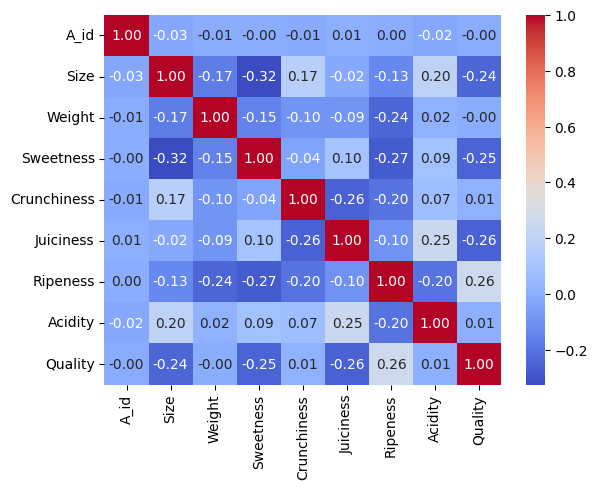

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Inference:

The columns 'A_id','Weight','Crunchiness', and 'Acidity' are less correlated with the target variable

Removing some columns based on relations in the correlation matrix heatmap

In [13]:
dropcolumns=['A_id','Weight','Crunchiness','Acidity']
df=df.drop(dropcolumns,axis=1)

Generating a pairplot for the dataset with the hue as 'Quality'

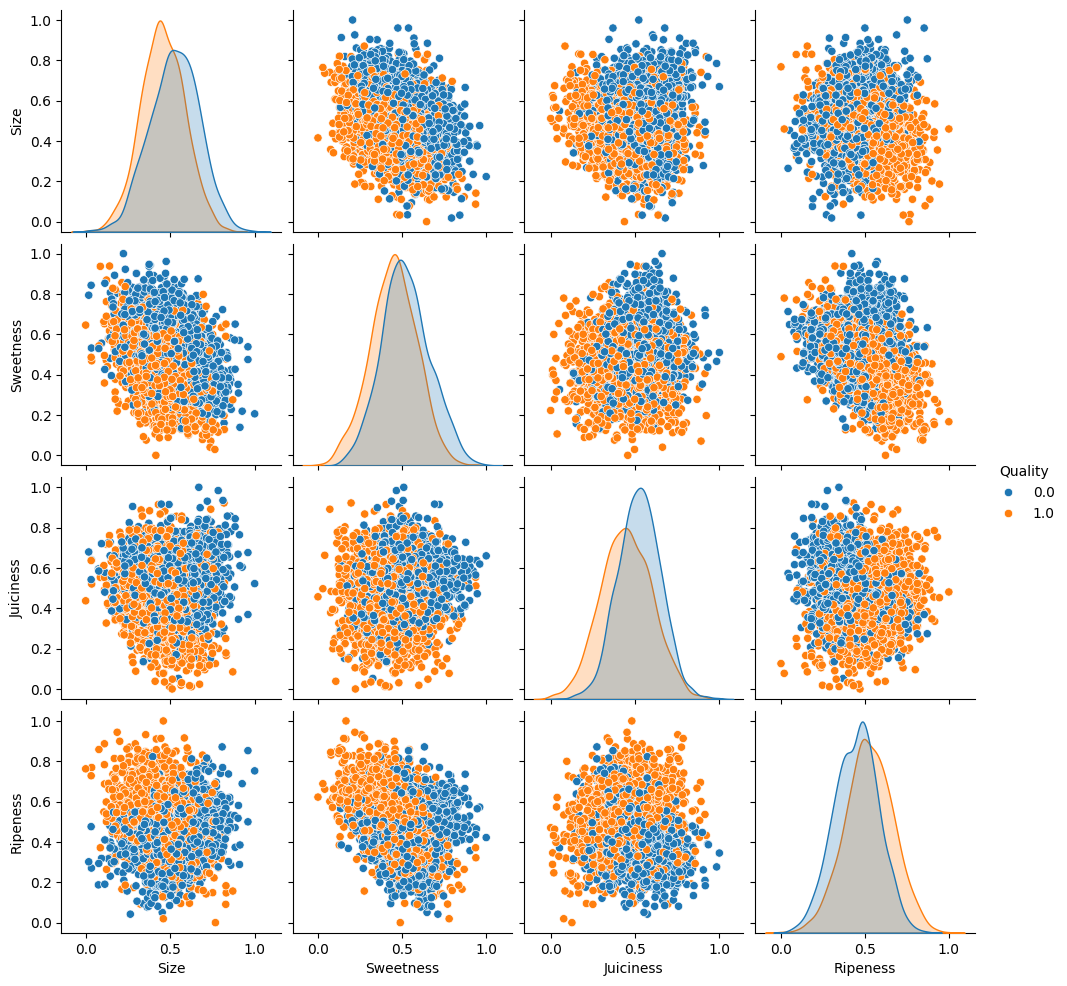

In [14]:
sns.pairplot(df,hue='Quality')

Inference:

1.When the sweetness is less and the ripeness is high ,the quality is good

2.When the juiceness is low and the ripeness is high,the quality is good

3.When the size is less and the sweetness is less,the quality is good

Creating input feature and target variable arrays for the prediction

In [15]:
X = df.iloc[:,:-1].values

Y = df.iloc[:,-1:].values

Splitting the target and feature variables as test and train sets

In [16]:
# Splitting dataset into train and test set

def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)

    num_test_samples = int(test_size * num_samples)

    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)

    mask_train = np.ones(num_samples, dtype=bool)
    mask_train[test_indices] = False
    X_train, X_test = X[mask_train], X[~mask_train]
    Y_train, Y_test = Y[mask_train], Y[~mask_train]

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = custom_train_test_split(X, Y, test_size=0.3, random_state=42)

Creating an instance of the K-Nearest Neighbors class and assigning it to a variable,training the classification model using the training data and generating predictions using the trained model for both sklearn and the custom model classes

In [17]:
# Model training

model = K_Nearest_Neighbors_Classifier( K = 5 )

model.fit( X_train, Y_train )

model1 = KNeighborsClassifier( n_neighbors = 5 )

model1.fit( X_train, Y_train )

# Prediction on test set

Y_pred = model.predict( X_test )

Y_pred1 = model1.predict( X_test )

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Printing the accuracy and classification report for  sklearn's K-Nearest Neighbors model

In [18]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred1)
print(f"Accuracy by sklearn model: {accuracy * 100:.2f}%")


# Display additional classification metrics

print("Classification Report:")
print(classification_report(Y_test, Y_pred1))

Accuracy by sklearn model: 78.42%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79       607
         1.0       0.78      0.78      0.78       593

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200



Printing the accuracy,classification report and confusion matrix for the custom K-Nearest Neighbors model


Accuracy by our model: 78.42%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79       607
         1.0       0.78      0.78      0.78       593

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200

Confusion Matrix:


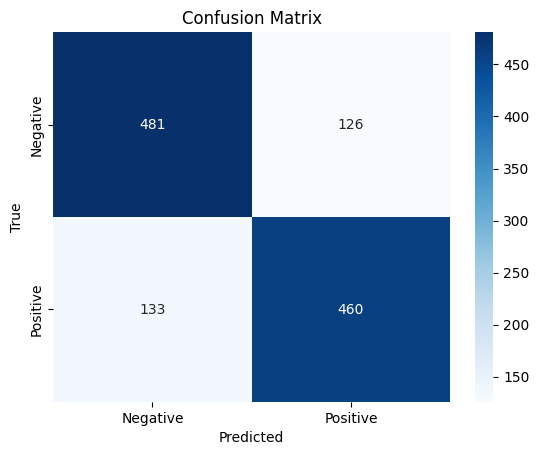

In [19]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy by our model: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Plotting the Receiver Operating Characteristics Curve

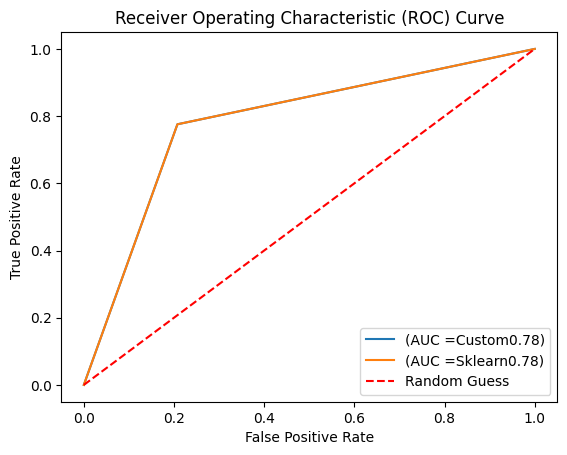

In [20]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc

models={'Custom':Y_pred,'Sklearn':Y_pred1}
for model_name, model_prob in models.items():
  fpr, tpr, thresholds = roc_curve(Y_test,model_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'(AUC ={model_name}{roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Inference:

The custom and the sklearn models accuracy are same which indicates the model is a perfect one
